<a href="https://colab.research.google.com/github/denny1018/bigdata/blob/main/week6_%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("rJava")
install.packages("jiebaR")
install.packages("tmcn")
install.packages("Rwordseg", repos = "http://R-Forge.R-project.org")
install.packages("dplyr")
install.packages("lubridate")
install.packages("stringr")
install.packages("wordcloud")
install.packages("wordcloud2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘jiebaRD’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is not available”
Warning message in install.packages("Rwordseg", repos = "http://R-Forge.R-project.org"):
“installation of package ‘Rwordseg’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud) 
library(wordcloud2) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: jiebaRD

Loading required package: RColorBrewer



In [3]:
content <- "太魯閣號出軌事件造成嚴重死傷，主嫌李義祥第一時間表示利用假日巡視工地的說法是鬼扯，因為他一早到工地是和其他工人動用怪手及工程車吊臂吊掛大型機具歸位，未料，因操作問題而導致重物掉落，才讓工程車滑落邊坡。案發後，李義祥沒有先打電話報警求援，而是打給台鐵花蓮工務段及監造商聯合大地公司人員，不久後被受傷民眾及救護車拍到與李義祥站在一起的其中1名體型壯碩的男子，就是台鐵花蓮工務段施工主任熊德育，他在第一時間已被相關單位約詢。
由於工程車滑落至軌道離太魯閣號撞上，中間大約仍有5到8分鐘的黃金救命時刻，此時只要緊急通知台鐵，再轉知列車駕駛，即有可能讓太魯閣號急煞，得以避免這場災難發生，因此，李義祥究竟是幾點打電話給熊德育及聯合大地公司或施工廠商東新營造求援，成為全案追查的另個重大關鍵。
本刊掌握，交通部人員、台鐵官員、監造商聯合大地、施工商東新營造及兼任工地主任且分包工程的李義祥等人，對於「鐵路行車安全改善6年計畫-北迴線K51+170～500山側邊坡安全防護設施工程」透過LINE組成群組，以方便討論追蹤工程進度。交通部雖然早已發函要求李義祥等廠商在4月清明連假期間全面停工，但相關承辦官員仍在4月1日連假前夕，透過LINE群組再度叮嚀李義祥等人從4月2日至5日的連假期間不得施工，最後不忘提醒李義祥等人要把工地器具整理歸位，歸好位置後還要拍照回傳。
未料，李義祥隔天一早竟跑去工地，為了整理器具，他還找了其他工人一起調配施工機械及歸位，雖未違約施工，但當他利用工程車吊臂及怪手吊掛大型器具時，可能因操作失誤或鋼纜鬆脫，導致器具重重摔落地面，工程車被這突然一震，整輛車子隨後就慢慢往邊坡滑落，李義祥等人來不及反應，10噸重的工程車已橫躺在台鐵軌道上。
由於相關群組對話全被掌握，證明李義祥巡視工地辯詞根本是在說謊，成為他才遭法院裁定收押禁見的理由之一。此外，花蓮地檢署為了查明真相，連日來不眠不休，全體24名檢察官停休，分組投入辦案，檢察長俞秀端親自坐鎮現場指揮，花檢至今傳訊超過10人，更派人協助被害人及家屬查扣李義祥或東新營造公司財產，幕後有無相關共犯或牽扯出更大案外案，檢方正如火如荼偵辦中。"

In [4]:
content

[1] "太魯閣號出軌事件造成嚴重死傷，主嫌李義祥第一時間表示利用假日巡視工地的說法是鬼扯，因為他一早到工地是和其他工人動用怪手及工程車吊臂吊掛大型機具歸位，未料，因操作問題而導致重物掉落，才讓工程車滑落邊坡。案發後，李義祥沒有先打電話報警求援，而是打給台鐵花蓮工務段及監造商聯合大地公司人員，不久後被受傷民眾及救護車拍到與李義祥站在一起的其中1名體型壯碩的男子，就是台鐵花蓮工務段施工主任熊德育，他在第一時間已被相關單位約詢。\n由於工程車滑落至軌道離太魯閣號撞上，中間大約仍有5到8分鐘的黃金救命時刻，此時只要緊急通知台鐵，再轉知列車駕駛，即有可能讓太魯閣號急煞，得以避免這場災難發生，因此，李義祥究竟是幾點打電話給熊德育及聯合大地公司或施工廠商東新營造求援，成為全案追查的另個重大關鍵。\n本刊掌握，交通部人員、台鐵官員、監造商聯合大地、施工商東新營造及兼任工地主任且分包工程的李義祥等人，對於「鐵路行車安全改善6年計畫-北迴線K51+170～500山側邊坡安全防護設施工程」透過LINE組成群組，以方便討論追蹤工程進度。交通部雖然早已發函要求李義祥等廠商在4月清明連假期間全面停工，但相關承辦官員仍在4月1日連假前夕，透過LINE群組再度叮嚀李義祥等人從4月2日至5日的連假期間不得施工，最後不忘提醒李義祥等人要把工地器具整理歸位，歸好位置後還要拍照回傳。\n未料，李義祥隔天一早竟跑去工地，為了整理器具，他還找了其他工人一起調配施工機械及歸位，雖未違約施工，但當他利用工程車吊臂及怪手吊掛大型器具時，可能因操作失誤或鋼纜鬆脫，導致器具重重摔落地面，工程車被這突然一震，整輛車子隨後就慢慢往邊坡滑落，李義祥等人來不及反應，10噸重的工程車已橫躺在台鐵軌道上。\n由於相關群組對話全被掌握，證明李義祥巡視工地辯詞根本是在說謊，成為他才遭法院裁定收押禁見的理由之一。此外，花蓮地檢署為了查明真相，連日來不眠不休，全體24名檢察官停休，分組投入辦案，檢察長俞秀端親自坐鎮現場指揮，花檢至今傳訊超過10人，更派人協助被害人及家屬查扣李義祥或東新營造公司財產，幕後有無相關共犯或牽扯出更大案外案，檢方正如火如荼偵辦中。"

In [5]:
cutter <- worker(bylines = F)

In [6]:
cutter[content]

[1] "太魯閣"   "號"       "出軌"     "事件"     "造成"     "嚴重"    
  [7] "死傷"     "主嫌"     "李義祥"   "第一"     "時間"     "表示"    
 [13] "利用"     "假日"     "巡視"     "工地"     "的"       "說法"    
 [19] "是"       "鬼扯"     "因為"     "他"       "一早"     "到"      
 [25] "工地"     "是"       "和"       "其他"     "工人"     "動用"    
 [31] "怪手"     "及"       "工程車"   "吊臂"     "吊掛"     "大型"    
 [37] "機具"     "歸位"     "未料"     "因"       "操作"     "問題"    
 [43] "而"       "導致"     "重物"     "掉落"     "才"       "讓"      
 [49] "工程車"   "滑落"     "邊坡"     "案發後"   "李義祥"   "沒有"    
 [55] "先"       "打電話"   "報警"     "求援"     "而是"     "打給"    
 [61] "台鐵"     "花蓮"     "工務段"   "及"       "監造"     "商"      
 [67] "聯合"     "大地"     "公司"     "人員"     "不久"     "後"      
 [73] "被"       "受傷"     "民眾"     "及"       "救護車"   "拍到"    
 [79] "與"       "李義祥"   "站"       "在"       "一起"     "的"      
 [85] "其中"     "1"        "名"       "體型"     "壯碩"     "的"      
 [91] "男子"     "就是"     "台鐵"     "花蓮"     "工務段"   "施工"    
 [97] "主任"     "熊"       "德育"     "他"       "在"       "第一"    
[103] "時間"     "已"       "被"       "相關"     "單位"     "約詢"    
[109] "由於"     "工程車"   "滑落"     "至"       "軌道"     "離"      
[115] "太魯閣"   "號撞"     "上"       "中間"     "大約"     "仍"      
[121] "有"       "5"        "到"       "8"        "分鐘"     "的"      
[127] "黃金"     "救命"     "時刻"     "此時"     "只要"     "緊急通知"
[133] "台鐵"     "再"       "轉知"     "列車"     "駕駛"     "即"      
[139] "有"       "可能"     "讓"       "太魯閣"   "號"       "急煞"    
[145] "得以"     "避免"     "這場"     "災難"     "發生"     "因此"    
[151] "李義祥"   "究竟"     "是"       "幾點"     "打電話"   "給熊"    
[157] "德育"     "及"       "聯合"     "大地"     "公司"     "或"      
[163] "施工"     "廠商"     "東新"     "營造"     "求援"     "成為"    
[169] "全案"     "追查"     "的"       "另個"     "重大"     "關鍵"    
[175] "本刊"     "掌握"     "交通部"   "人員"     "台"       "鐵"      
[181] "官員"     "監造"     "商"       "聯合"     "大地"     "施工"    
[187] "商東"     "新"       "營造"     "及"       "兼任"     "工地"    
[193] "主任"     "且"       "分包"     "工程"     "的"       "李義祥"  
[199] "等"       "人"       "對於"     "鐵路"     "行車"     "安全"    
[205] "改善"     "6"        "年"       "計畫"     "北迴"     "線"      
[211] "K51"      "170"      "500"      "山側"     "邊坡"     "安全"    
[217] "防護"     "設施"     "工程"     "透過"     "LINE"     "組成"    
[223] "群組"     "以"       "方便"     "討論"     "追蹤"     "工程進度"
[229] "交通部"   "雖然"     "早已"     "發函"     "要求"     "李義祥"  
[235] "等"       "廠商"     "在"       "4"        "月"       "清明"    
[241] "連假"     "期間"     "全面"     "停工"     "但"       "相關"    
[247] "承辦"     "官員"     "仍"       "在"       "4"        "月"      
[253] "1"        "日連假"   "前夕"     "透過"     "LINE"     "群組"    
[259] "再度"     "叮嚀"     "李義祥"   "等"       "人"       "從"      
[265] "4"        "月"       "2"        "日至"     "5"        "日"      
[271] "的"       "連假"     "期間"     "不得"     "施工"     "最後"    
[277] "不"       "忘"       "提醒"     "李義祥"   "等"       "人"      
[283] "要"       "把"       "工地"     "器具"     "整理"     "歸位"    
[289] "歸好"     "位置"     "後"       "還要"     "拍照"     "回傳"    
[295] "未料"     "李義祥"   "隔天"     "一早"     "竟"       "跑"      
[301] "去"       "工地"     "為"       "了"       "整理"     "器具"    
[307] "他"       "還找"     "了"       "其他"     "工人"     "一起"    
[313] "調配"     "施工"     "機械"     "及"       "歸位"     "雖未"    
[319] "違約"     "施工"     "但當"     "他"       "利用"     "工程車"  
[325] "吊臂"     "及"       "怪手"     "吊掛"     "大型"     "器具"    
[331] "時"       "可能"     "因"       "操作失誤" "或"       "鋼纜"    
[337] "鬆脫"     "導致"     "器具"     "重重"     "摔落"     "地面"    
[343] "工程車"   "被"       "這"       "突然"     "一震"     "整輛"    
[349] "車子"     "隨後"     "就"       "慢慢"     "往"       "邊坡"    
[355] "滑落"     "李義祥"   "等"       "人"       "來不及"   "反應"    
[361] "10"       "噸重"     "的"       "工程車"   "已"       "橫躺"    
[367] "在"       "台"       "鐵"       "軌道"     "上"       "由於"    
[373] "相關"     "群組"     "對話"     "全"       "被"       "掌握"    
[379] "證明"     "李義祥"   "巡視"     "工地"     "辯詞"     "根本"    
[385] "是"       "在"       "說謊"     "成為"     "他"       "才"     

In [7]:
new_words <- c("太魯閣號","大型機具","鋼纜鬆脫")
# 一次只能加入一個詞，常常需要搭配迴圈使用
for (i in 1:length(new_words)) {
  new_user_word(cutter, new_words[i])
}

In [8]:
writeLines(new_words, "new_words.txt")

In [9]:
stop_words <- c("在","之","更","個","未","而","也","與","的")
writeLines(stop_words, "stop_words.txt")

In [10]:
cutter <- worker(user = "new_words.txt", stop_word = "stop_words.txt", bylines = FALSE)
seg_words <- cutter[content]
seg_words

[1] "太魯閣號" "出軌"     "事件"     "造成"     "嚴重"     "死傷"    
  [7] "主嫌"     "李義祥"   "第一"     "時間"     "表示"     "利用"    
 [13] "假日"     "巡視"     "工地"     "說法"     "是"       "鬼扯"    
 [19] "因為"     "他"       "一早"     "到"       "工地"     "是"      
 [25] "和"       "其他"     "工人"     "動用"     "怪手"     "及"      
 [31] "工程車"   "吊臂"     "吊掛"     "大型機具" "歸位"     "未料"    
 [37] "因"       "操作"     "問題"     "導致"     "重物"     "掉落"    
 [43] "才"       "讓"       "工程車"   "滑落"     "邊坡"     "案發後"  
 [49] "李義祥"   "沒有"     "先"       "打電話"   "報警"     "求援"    
 [55] "而是"     "打給"     "台鐵"     "花蓮"     "工務段"   "及"      
 [61] "監造"     "商"       "聯合"     "大地"     "公司"     "人員"    
 [67] "不久"     "後"       "被"       "受傷"     "民眾"     "及"      
 [73] "救護車"   "拍到"     "李義祥"   "站"       "一起"     "其中"    
 [79] "1"        "名"       "體型"     "壯碩"     "男子"     "就是"    
 [85] "台鐵"     "花蓮"     "工務段"   "施工"     "主任"     "熊"      
 [91] "德育"     "他"       "第一"     "時間"     "已"       "被"      
 [97] "相關"     "單位"     "約詢"     "由於"     "工程車"   "滑落"    
[103] "至"       "軌道"     "離"       "太魯閣號" "撞"       "上"      
[109] "中間"     "大約"     "仍"       "有"       "5"        "到"      
[115] "8"        "分鐘"     "黃金"     "救命"     "時刻"     "此時"    
[121] "只要"     "緊急通知" "台鐵"     "再"       "轉知"     "列車"    
[127] "駕駛"     "即"       "有"       "可能"     "讓"       "太魯閣號"
[133] "急煞"     "得以"     "避免"     "這場"     "災難"     "發生"    
[139] "因此"     "李義祥"   "究竟"     "是"       "幾點"     "打電話"  
[145] "給熊"     "德育"     "及"       "聯合"     "大地"     "公司"    
[151] "或"       "施工"     "廠商"     "東新"     "營造"     "求援"    
[157] "成為"     "全案"     "追查"     "另個"     "重大"     "關鍵"    
[163] "本刊"     "掌握"     "交通部"   "人員"     "台"       "鐵"      
[169] "官員"     "監造"     "商"       "聯合"     "大地"     "施工"    
[175] "商東"     "新"       "營造"     "及"       "兼任"     "工地"    
[181] "主任"     "且"       "分包"     "工程"     "李義祥"   "等"      
[187] "人"       "對於"     "鐵路"     "行車"     "安全"     "改善"    
[193] "6"        "年"       "計畫"     "北迴"     "線"       "K51"     
[199] "170"      "500"      "山側"     "邊坡"     "安全"     "防護"    
[205] "設施"     "工程"     "透過"     "LINE"     "組成"     "群組"    
[211] "以"       "方便"     "討論"     "追蹤"     "工程進度" "交通部"  
[217] "雖然"     "早已"     "發函"     "要求"     "李義祥"   "等"      
[223] "廠商"     "4"        "月"       "清明"     "連假"     "期間"    
[229] "全面"     "停工"     "但"       "相關"     "承辦"     "官員"    
[235] "仍"       "4"        "月"       "1"        "日連假"   "前夕"    
[241] "透過"     "LINE"     "群組"     "再度"     "叮嚀"     "李義祥"  
[247] "等"       "人"       "從"       "4"        "月"       "2"       
[253] "日至"     "5"        "日"       "連假"     "期間"     "不得"    
[259] "施工"     "最後"     "不"       "忘"       "提醒"     "李義祥"  
[265] "等"       "人"       "要"       "把"       "工地"     "器具"    
[271] "整理"     "歸位"     "歸好"     "位置"     "後"       "還要"    
[277] "拍照"     "回傳"     "未料"     "李義祥"   "隔天"     "一早"    
[283] "竟"       "跑"       "去"       "工地"     "為"       "了"      
[289] "整理"     "器具"     "他"       "還找"     "了"       "其他"    
[295] "工人"     "一起"     "調配"     "施工"     "機械"     "及"      
[301] "歸位"     "雖未"     "違約"     "施工"     "但當"     "他"      
[307] "利用"     "工程車"   "吊臂"     "及"       "怪手"     "吊掛"    
[313] "大型"     "器具"     "時"       "可能"     "因"       "操作失誤"
[319] "或"       "鋼纜鬆脫" "導致"     "器具"     "重重"     "摔落"    
[325] "地面"     "工程車"   "被"       "這"       "突然"     "一震"    
[331] "整輛"     "車子"     "隨後"     "就"       "慢慢"     "往"      
[337] "邊坡"     "滑落"     "李義祥"   "等"       "人"       "來不及"  
[343] "反應"     "10"       "噸重"     "工程車"   "已"       "橫躺"    
[349] "台"       "鐵"       "軌道"     "上"       "由於"     "相關"    
[355] "群組"     "對話"     "全"       "被"       "掌握"     "證明"    
[361] "李義祥"   "巡視"     "工地"     "辯詞"     "根本"     "是"      
[367] "說謊"     "成為"     "他"       "才"       "遭"       "法院"    
[373] "裁定"     "收押禁見" "理由"     "之一"     "此外"     "花蓮"    
[379] "地檢署"   "為"       "了"       "查明真相" "連日來"   "不眠不休"
[385] "全體"     "24"       "名"       "檢察官"   "停休"     "分組"    
[391] "投入"     "辦案"     "

In [11]:
txt_freq <- freq(seg_words)
txt_freq <- arrange(txt_freq, desc(freq))
head(txt_freq)

,char,freq
,<chr>,<dbl>
1,李義祥,12
2,及,8
3,施工,6
4,工地,6
5,工程車,6
6,人,6


In [12]:
install.packages("showtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [13]:
library(showtext)

Loading required package: sysfonts

Loading required package: showtextdb



In [14]:
showtext.auto(enable = TRUE)

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strheight(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'sans' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = siz

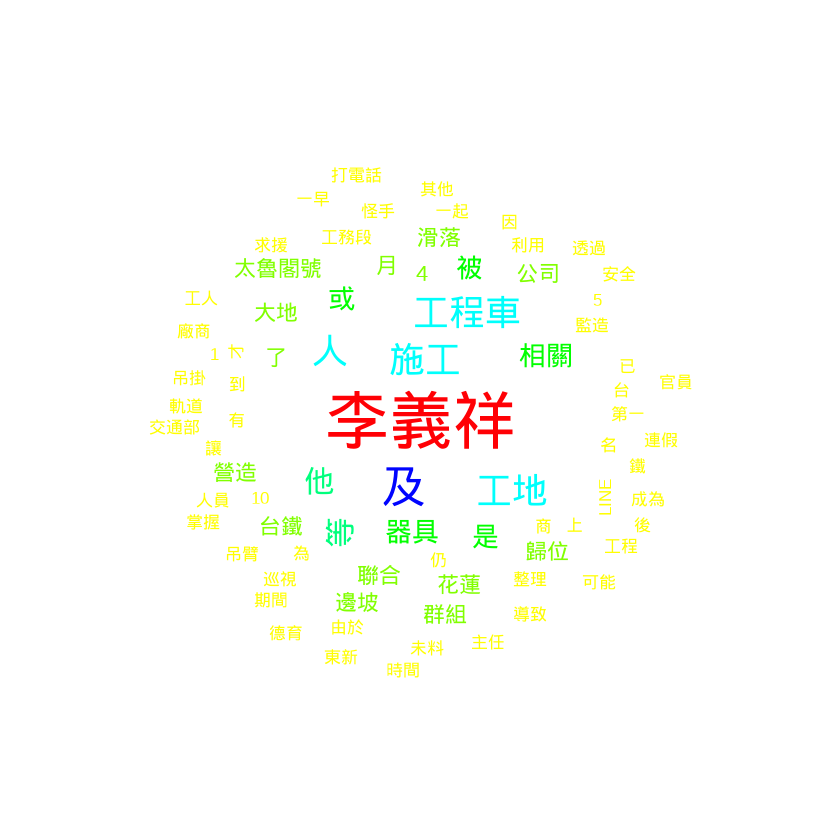

In [15]:
par(family=("Microsoft YaHei")) #一般wordcloud需要定義字體，不然會無法顯示中文
# 一般的文字雲 (pkg: wordcloud)
wordcloud(txt_freq$char, txt_freq$freq, min.freq = 2, random.order = F, ordered.colors = F, colors = rainbow(nrow(txt_freq)))